# Imports

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage 

# Download and organize the dataset (No Code required here)

In [3]:
def plot_histogram(image, axes, bins=256):
    """Plot an image's histogram along with cumulative histogram.
       Adapted from the scikit-image examples
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram with mathplot hist
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skimage.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [4]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)

!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

# Read the images from the folder 'data' into a list



In [5]:
# os.listdir <-- you may want to use this function

dataset_dir = "data" # this is the directory of the dataset

# Your code here
print(len(os.listdir("data")))
number_of_images = len(os.listdir("data"))

imgs = []

for i in range(number_of_images):
  image_name = "data/" + os.listdir("data")[i]
  imgs.append(skimage.io.imread(image_name))

print(len(imgs))
imgs[0]
imgs[99]

##

100
100


array([[[ 29,  30,  32],
        [ 30,  30,  30],
        [ 32,  30,  31],
        ...,
        [149, 167, 181],
        [145, 163, 177],
        [145, 162, 178]],

       [[ 30,  31,  33],
        [ 30,  31,  33],
        [ 29,  30,  32],
        ...,
        [149, 167, 181],
        [146, 164, 178],
        [144, 161, 177]],

       [[ 26,  30,  33],
        [ 27,  32,  36],
        [ 26,  31,  37],
        ...,
        [149, 167, 181],
        [146, 164, 178],
        [144, 161, 177]],

       ...,

       [[109, 101,  82],
        [109, 101,  80],
        [109, 101,  80],
        ...,
        [115, 118,  97],
        [114, 117,  96],
        [115, 118,  97]],

       [[109, 101,  82],
        [109, 101,  82],
        [109, 101,  80],
        ...,
        [116, 119,  98],
        [116, 119,  98],
        [117, 120,  99]],

       [[109, 101,  82],
        [109, 101,  82],
        [109, 101,  80],
        ...,
        [119, 122, 101],
        [119, 122, 101],
        [119, 122, 101]]

# Define a function that takes a list of images then samples 9 iamges from the list, then draws them using matplotlib in a 3x3 grid

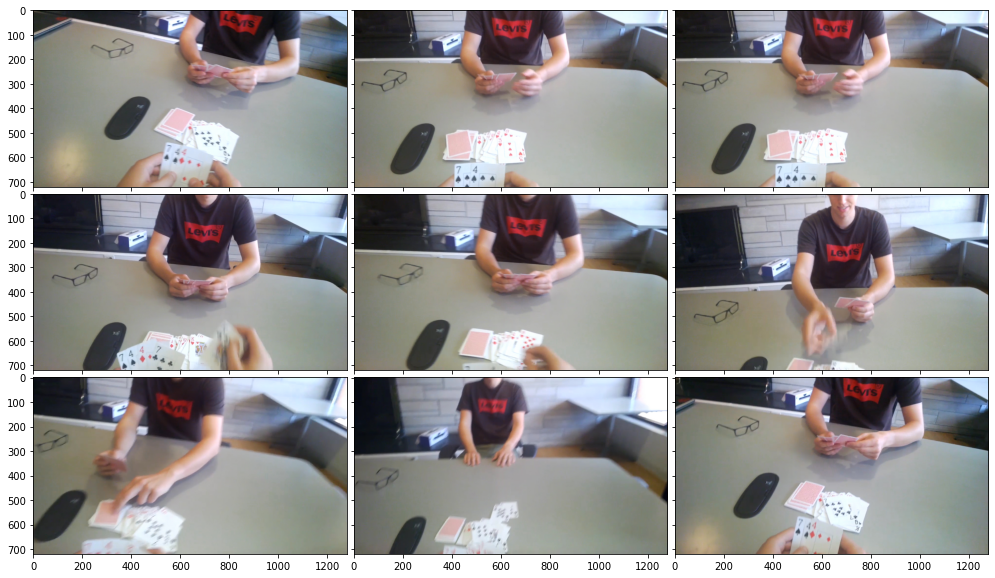

In [6]:
import random # u may need this library
from mpl_toolkits.axes_grid1 import ImageGrid


def draw_func(list_of_imgs):
  random.seed(100) # set a seed in case you want your experiments to be consistent
  try:
    fig = plt.figure(figsize=(20, 10))
    grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0.1)
    imageslist = []
    for i in range(9):
      index = random.randint(0, 99)
      imageslist.append(list_of_imgs[index])

    for ax, im in zip(grid, imageslist):
      ax.imshow(im, cmap=plt.cm.gray)

  except:
    pass

  plt.show()

## Test your function here
draw_func(imgs) # assuming that imgs is the name of the list
##

# Apply Gray scaling on the images

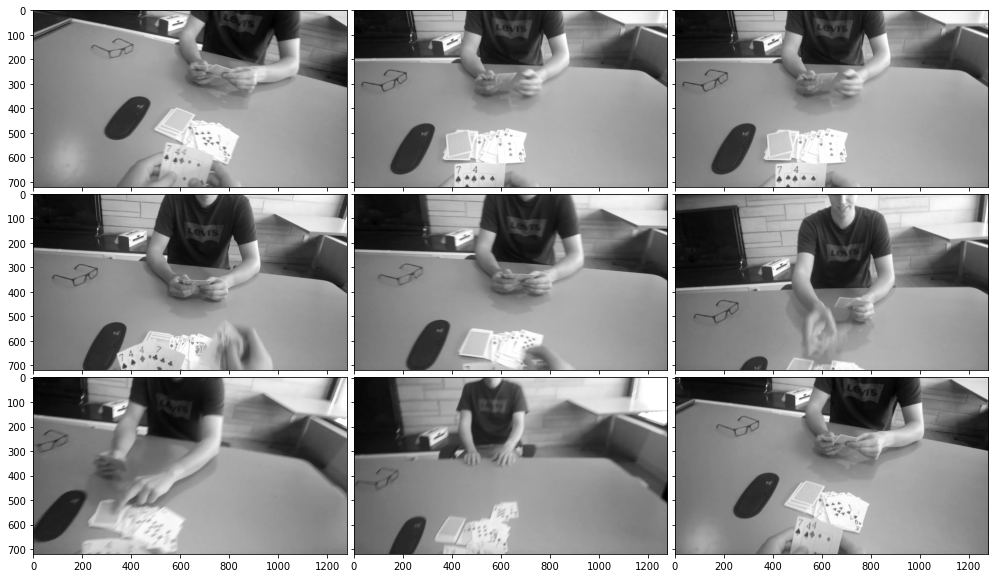

In [7]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function

# Your code here
gray_scale_imgs = []
for i in range(len(imgs)):
  gray_scale_imgs.append(skimage.color.rgb2gray(imgs[i]))
##



# Use your draw function to visualize the images
draw_func(gray_scale_imgs) # assuming that gray_scale_imgs is the name of the list

# Apply histogram equalization on the gray scale images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprec

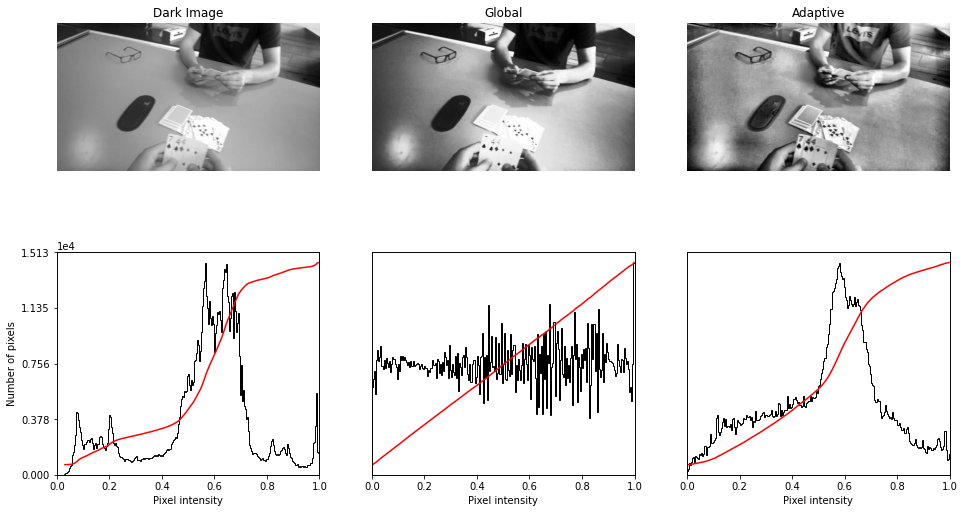

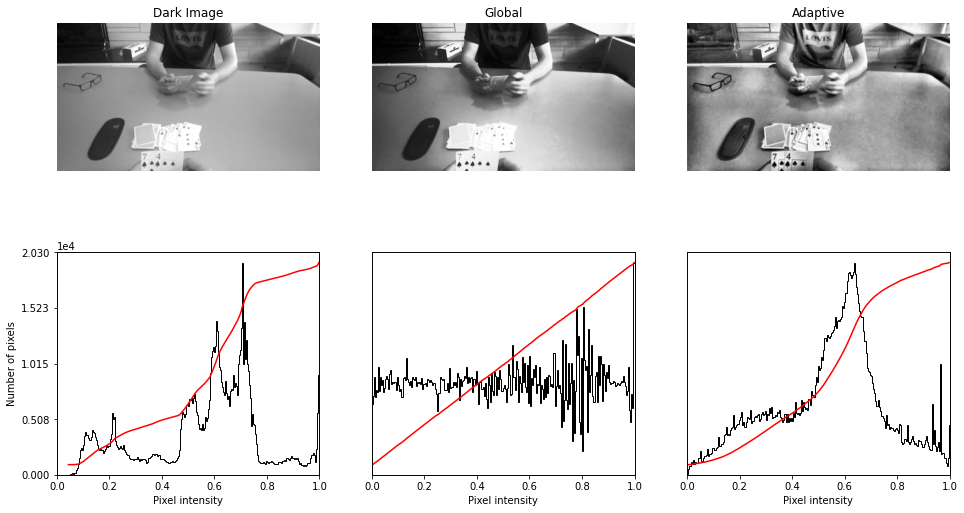

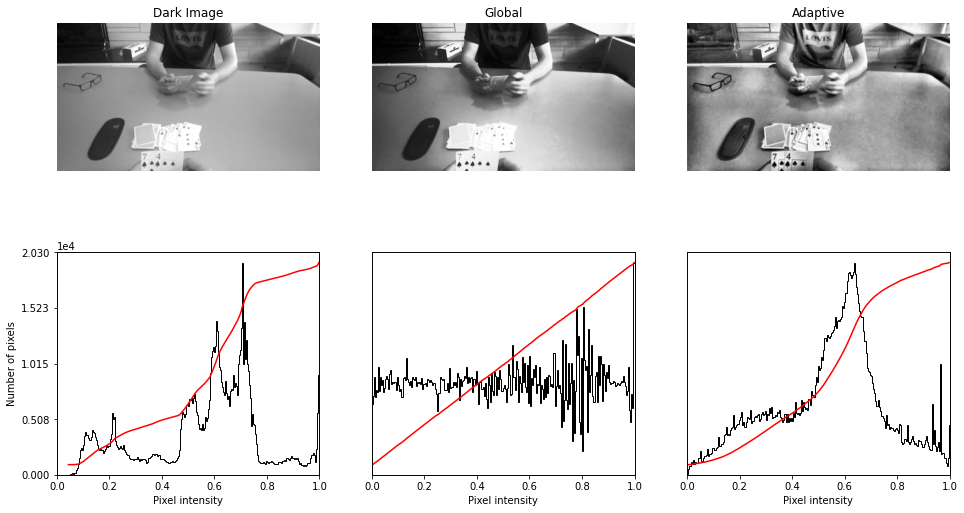

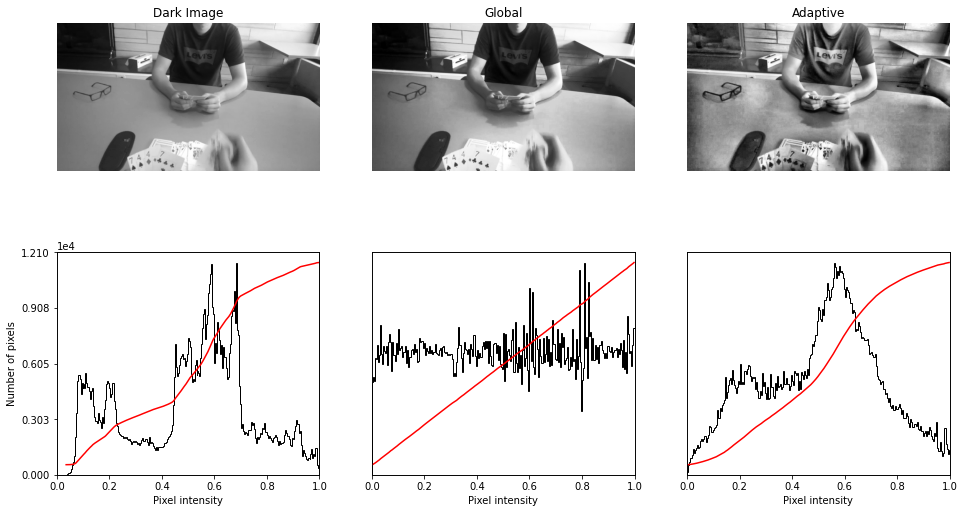

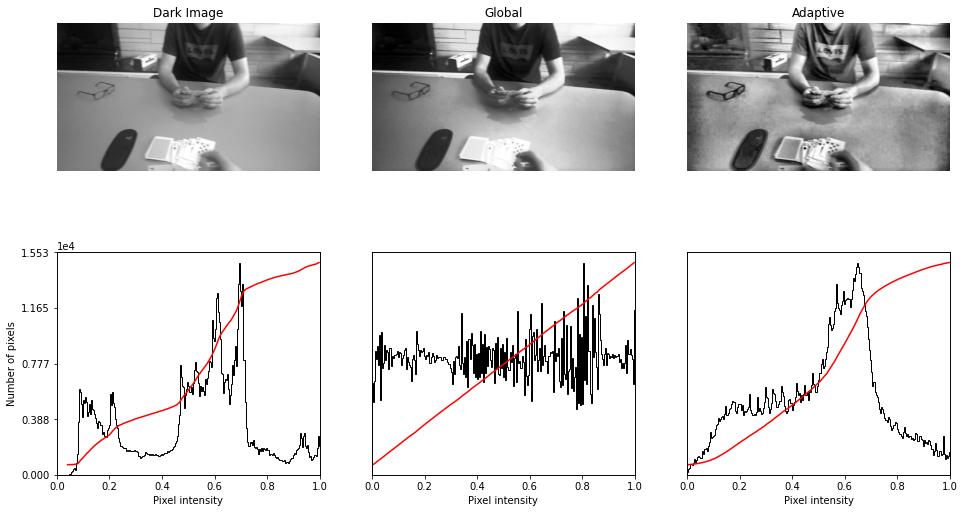

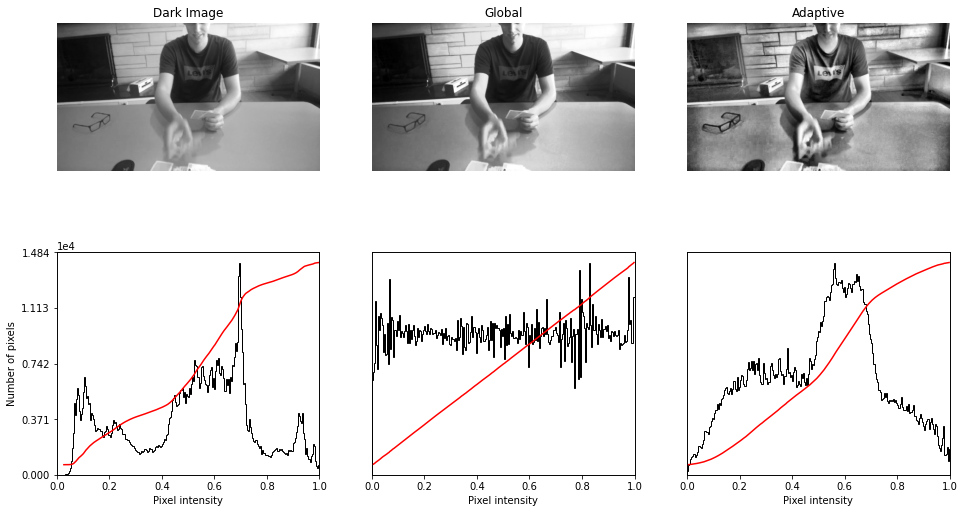

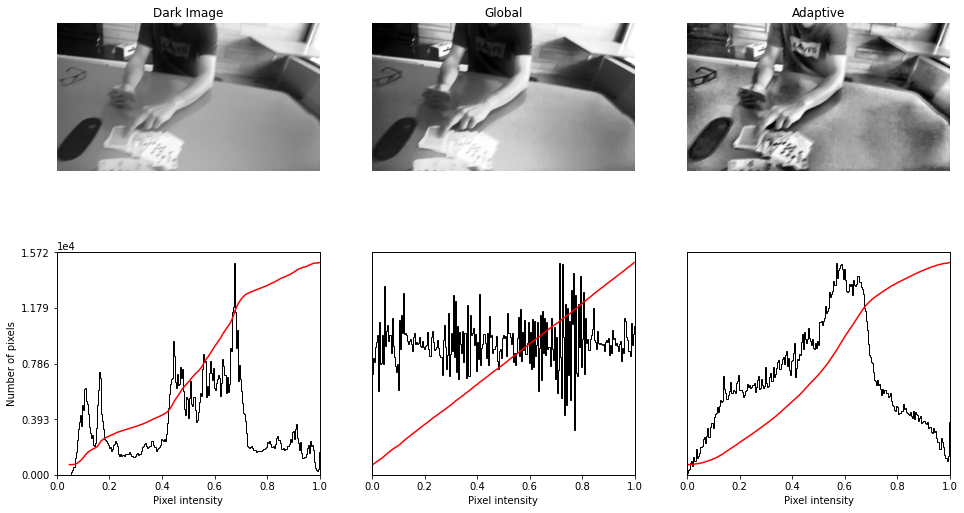

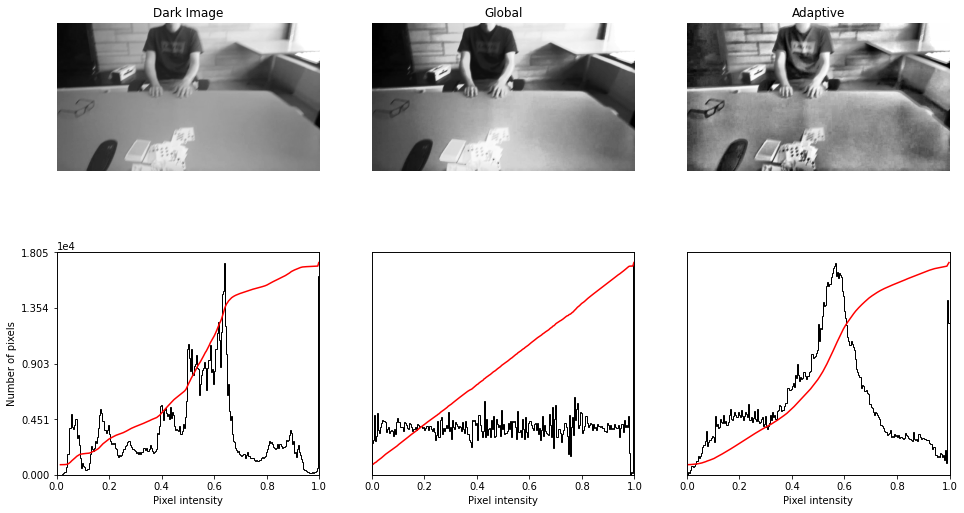

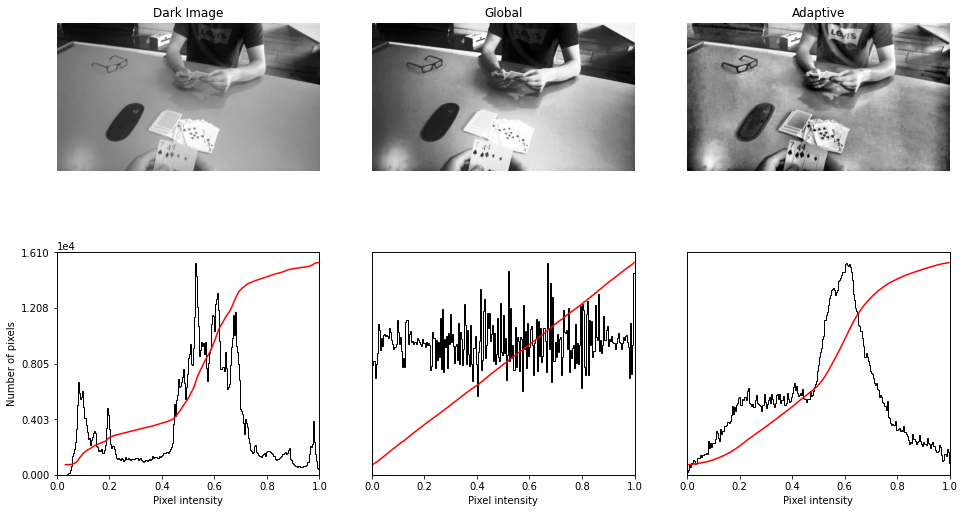

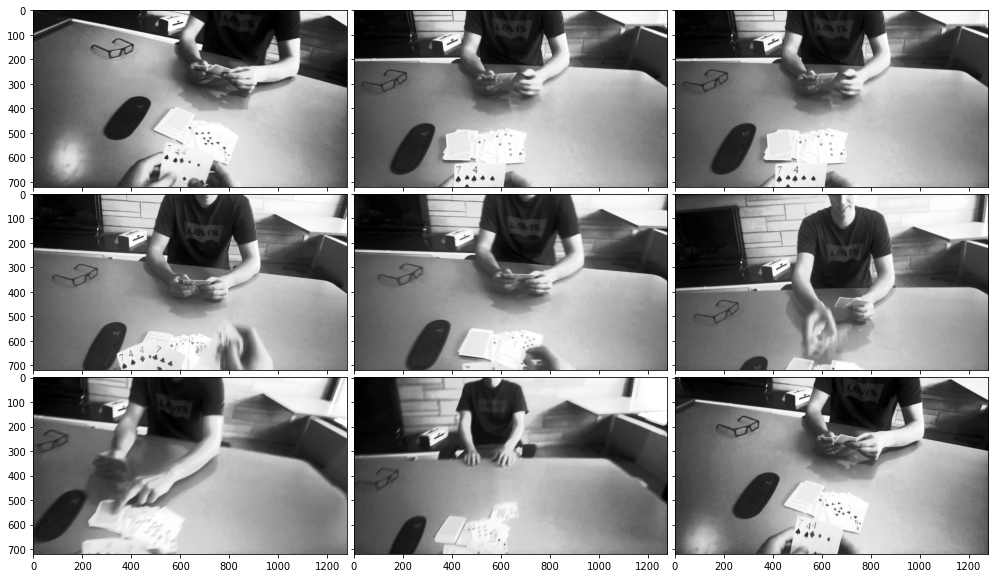

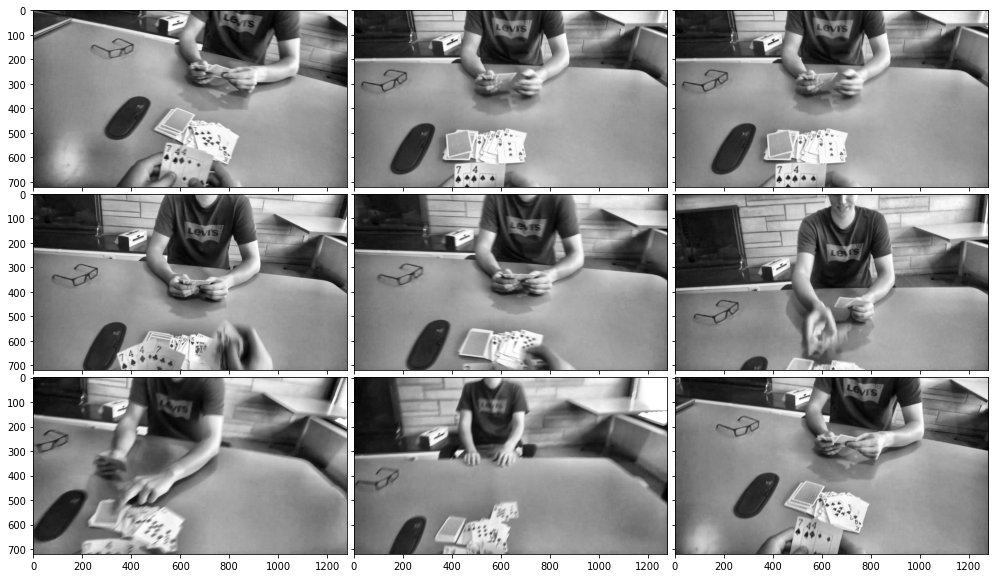

In [8]:
from skimage import exposure # You will probably need this function
random.seed(100) # set a seed in case you want your experiments to be consistent

equalizer_images_global = []
equalizer_images_adaptive = []

for i in range(100):
  equalizer_images_global.append(exposure.equalize_hist(gray_scale_imgs[i]))
  equalizer_images_adaptive.append(exposure.equalize_adapthist(gray_scale_imgs[i]))

for i in range(9):
  index = random.randint(0, 99)
  fig = plt.figure(figsize=(16, 9))
  axes = np.zeros((2, 3), dtype=np.object)
  axes[0, 0] = fig.add_subplot(2, 3, 1)
  for i in range(1, 3):
      axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
  for i in range(0, 3):
      axes[1, i] = fig.add_subplot(2, 3, 4+i)
  ax_img, ax_hist, ax_cdf = plot_histogram(gray_scale_imgs[index], axes[:, 0])
  ax_img.set_title('Dark Image')    

  y_min, y_max = ax_hist.get_ylim()
  ax_hist.set_ylabel('Number of pixels')
  ax_hist.set_yticks(np.linspace(0, y_max, 5))

  ax_img, ax_hist, ax_cdf = plot_histogram(exposure.equalize_hist(gray_scale_imgs[index]), axes[:, 1])
  ax_img.set_title('Global')

  ax_img, ax_hist, ax_cdf = plot_histogram(exposure.equalize_adapthist(gray_scale_imgs[index], clip_limit=0.03), axes[:, 2])
  ax_img.set_title('Adaptive')

# Use your draw function to visualize the images
draw_func(equalizer_images_global)
draw_func(equalizer_images_adaptive)

# Apply sobel edge detection on the equalized images

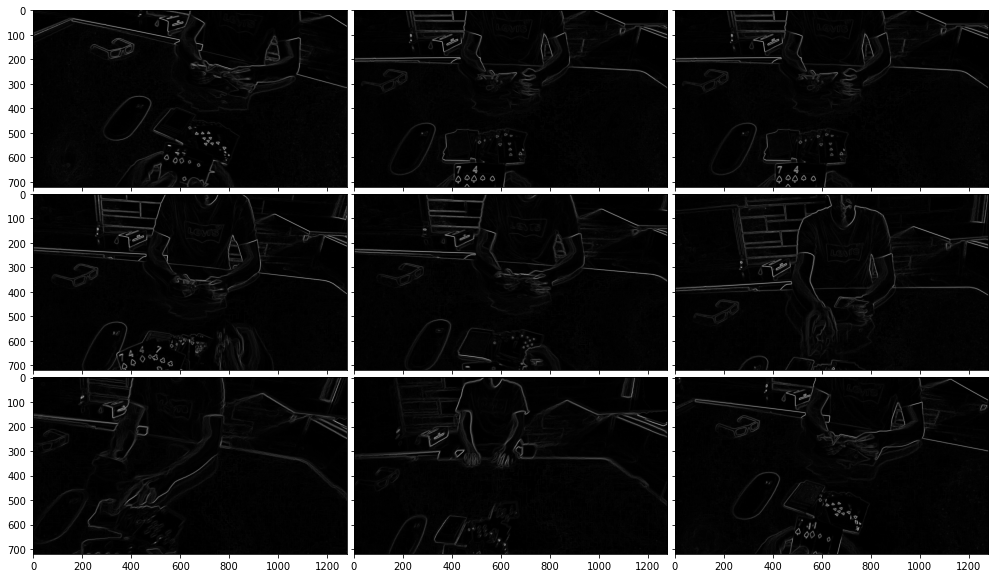

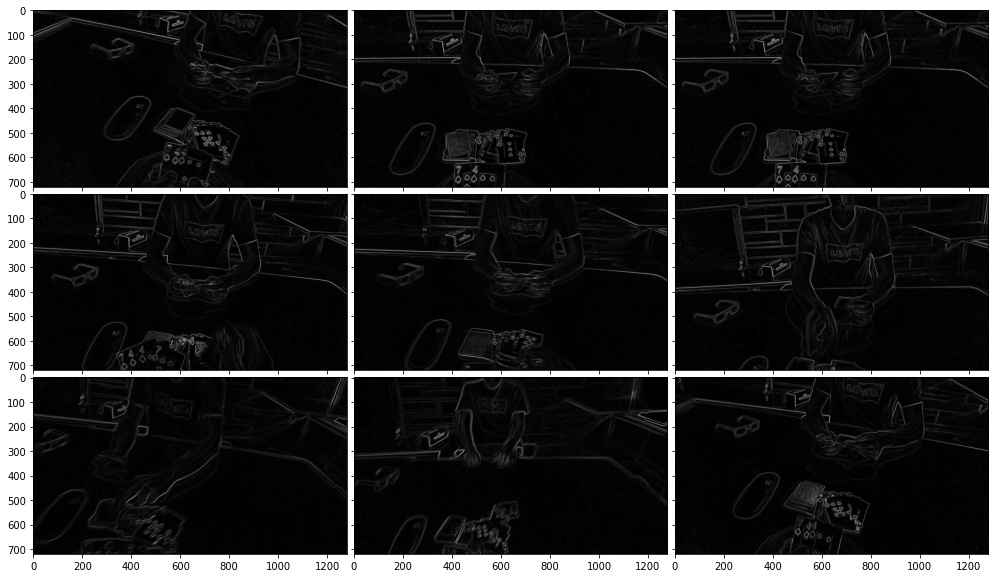

In [9]:
from skimage.filters import sobel # You will probably need this function



sobel_over_global = []
sobel_over_adaptive = []

# Your code here
for i in range(100):
  sobel_over_global.append(sobel(equalizer_images_global[i]))
  sobel_over_adaptive.append(sobel(equalizer_images_adaptive[i]))

##


# Use your draw function to visualize the images
draw_func(sobel_over_global)
draw_func(sobel_over_adaptive)

# Apply Gaussian derivative over the equalized images

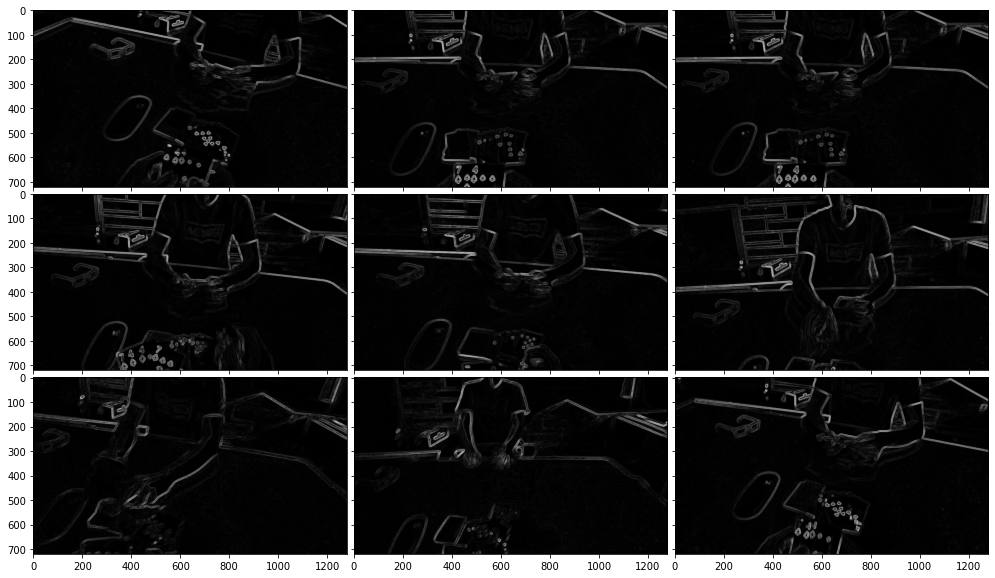

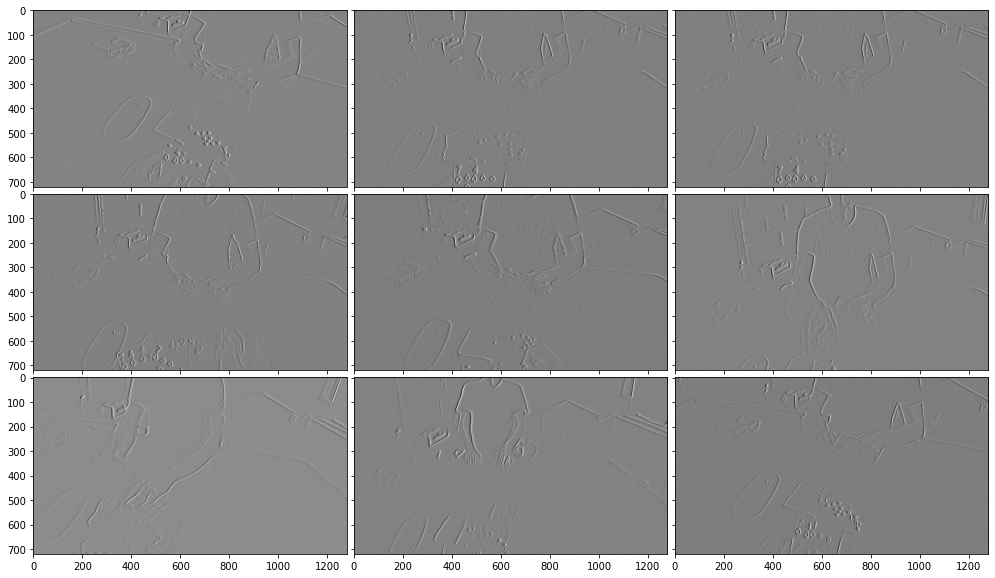

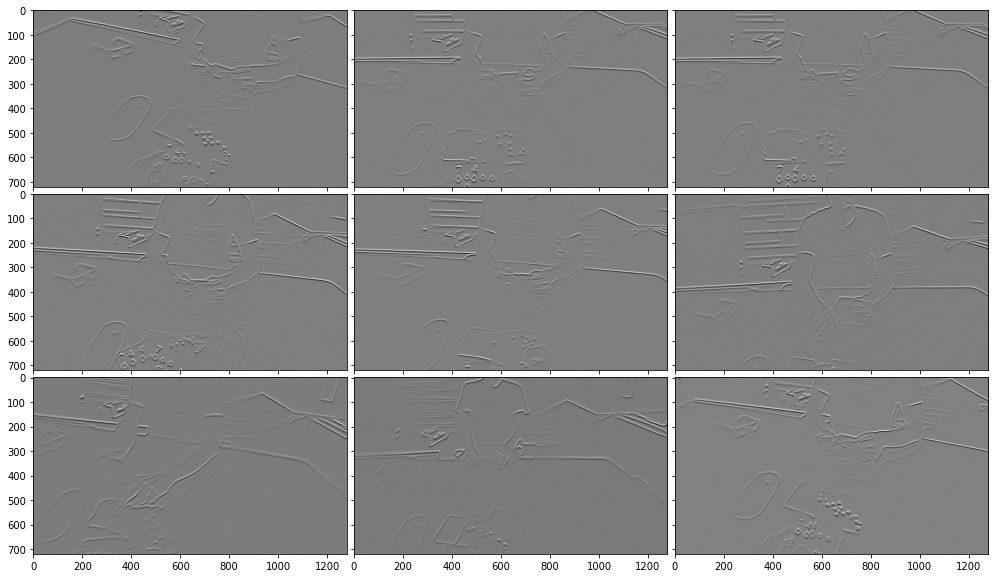

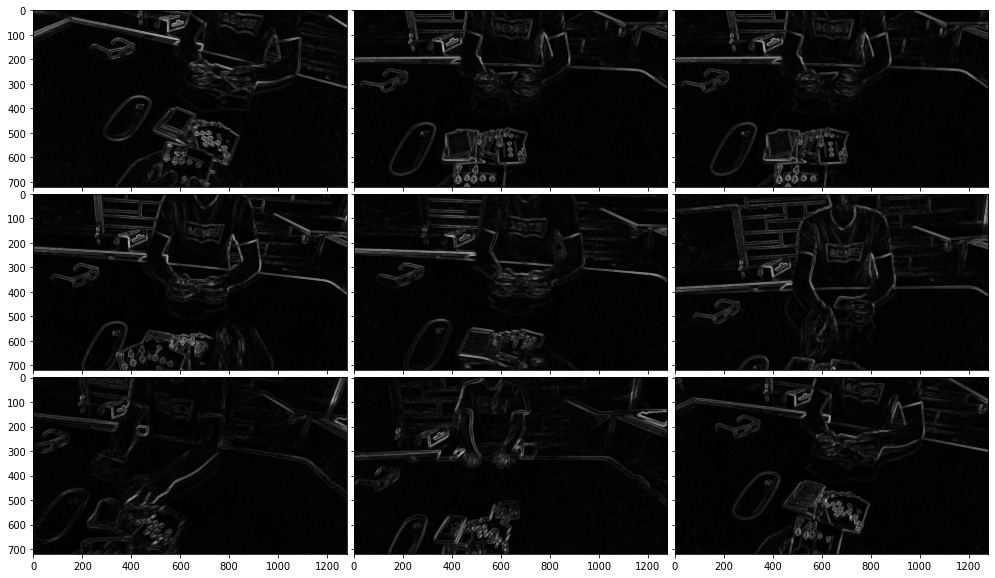

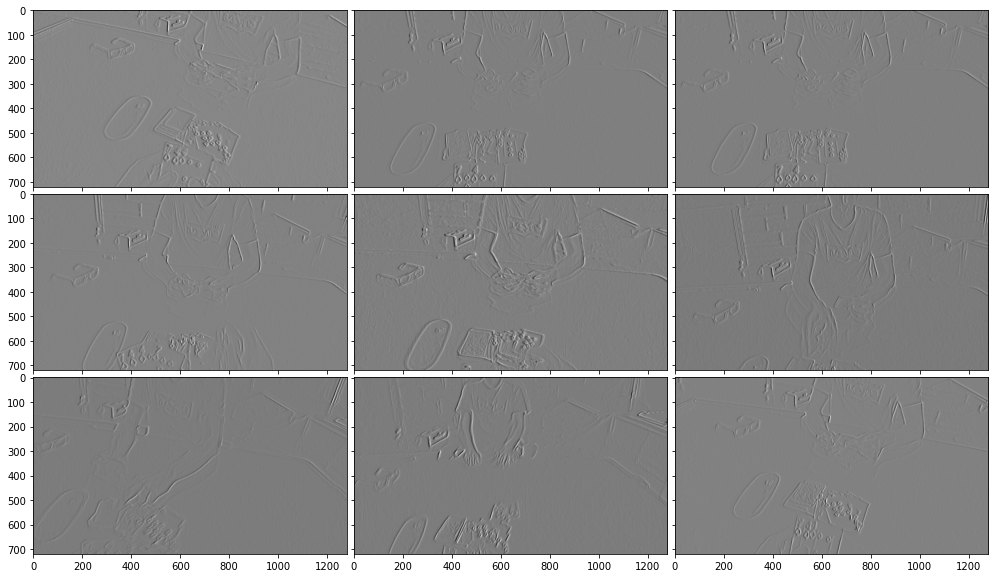

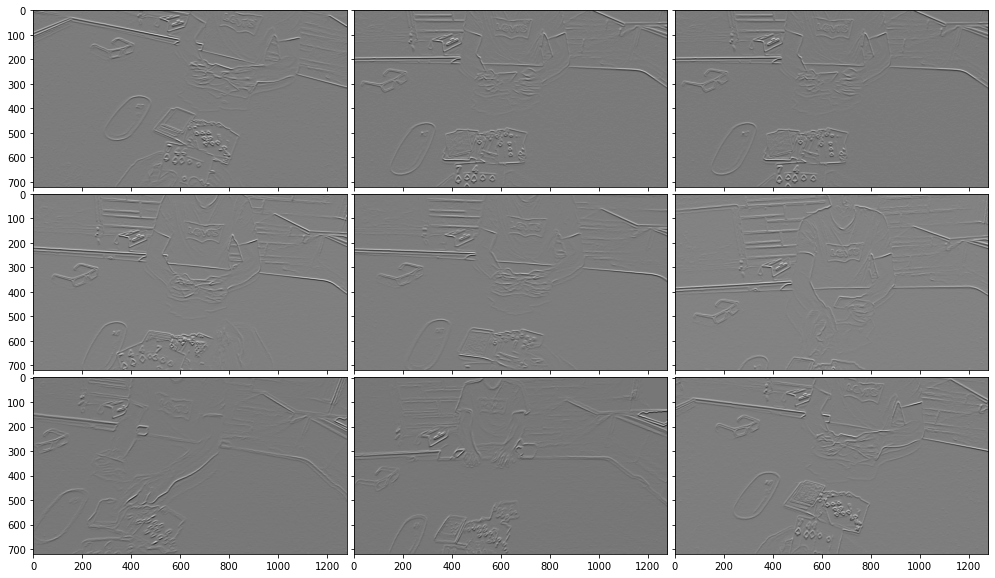

In [10]:
# you better check lab 1 notebook
import scipy.ndimage

# Your code here
weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,)) 
weights[:,2] = np.ones((3,)) 
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,)) 
weights[2,:] = -np.ones((3,)) 
DoGy = scipy.ndimage.convolve(gaussF, weights)

devX_over_global = []
devY_over_global = []

devX_over_adaptive = []
devY_over_adaptive = []

Magnitude_over_global = []
Magnitude_over_adaptive = []

for i in range(100):
  devX_over_global.append(scipy.ndimage.convolve(sobel_over_global[i], DoGx))
  devY_over_global.append(scipy.ndimage.convolve(sobel_over_global[i], DoGy))

  devX_over_adaptive.append(scipy.ndimage.convolve(sobel_over_adaptive[i], DoGx))
  devY_over_adaptive.append(scipy.ndimage.convolve(sobel_over_adaptive[i], DoGy))

  Magnitude_over_global.append(np.sqrt(np.square(devX_over_global[i]) + np.square(devY_over_global[i])))
  Magnitude_over_adaptive.append(np.sqrt(np.square(devX_over_adaptive[i]) + np.square(devY_over_adaptive[i])))

##


# Use your draw function to visualize the magnitude
draw_func(Magnitude_over_global)

draw_func(devX_over_global)
draw_func(devY_over_global)

# Use your draw function to visualize the orientation
draw_func(Magnitude_over_adaptive)

draw_func(devX_over_adaptive)
draw_func(devY_over_adaptive)




# Bonus: Search for super pixeling and apply it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


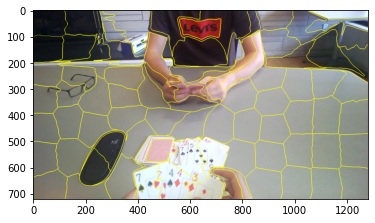

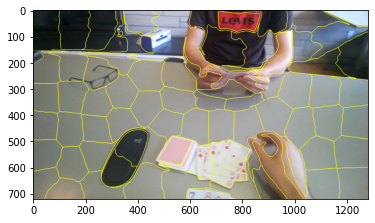

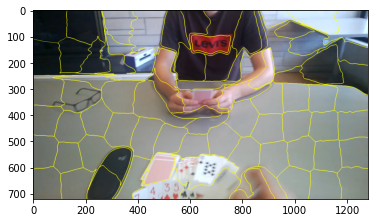

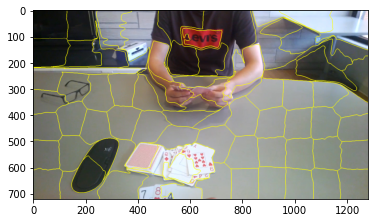

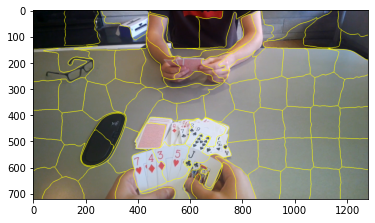

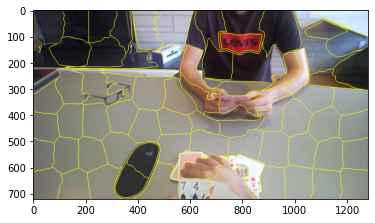

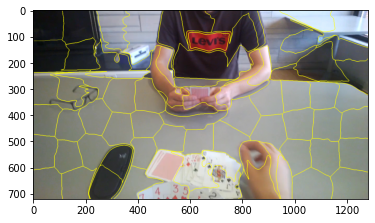

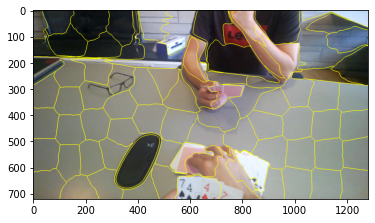

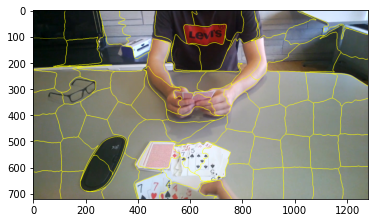

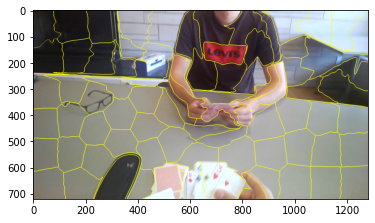

In [17]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse

images_as_float = []
super_pixels = []
# Your code here

for i in range(10):
  images_as_float.append(img_as_float(imgs[i]))
  super_pixels.append(slic(images_as_float[i], n_segments = 100, sigma = 5))

  fig = plt.figure("Superpixels -- %d segments%")
  ax = fig.add_subplot(1, 1, 1)
  ax.imshow(mark_boundaries(images_as_float[i], super_pixels[i]))
  plt.show()

##

# Use your draw function to visualize the results
# draw_func(super_pixels)